In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'salary')

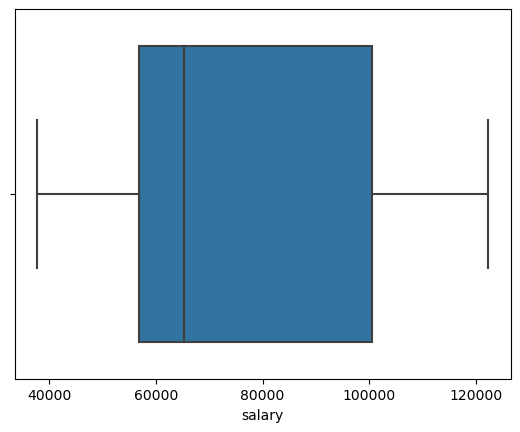

In [9]:
#checking for outliers
sn.boxplot(data["Salary"])
plt.xlabel ("salary")

In [10]:
#checking for duplicate values 
data[data.duplicated()]

,YearsExperience,Salary


In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


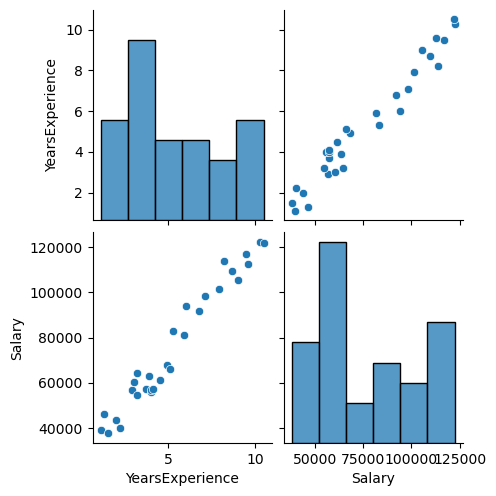

In [12]:
#checking the correlation using the pairplot
sn.pairplot(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

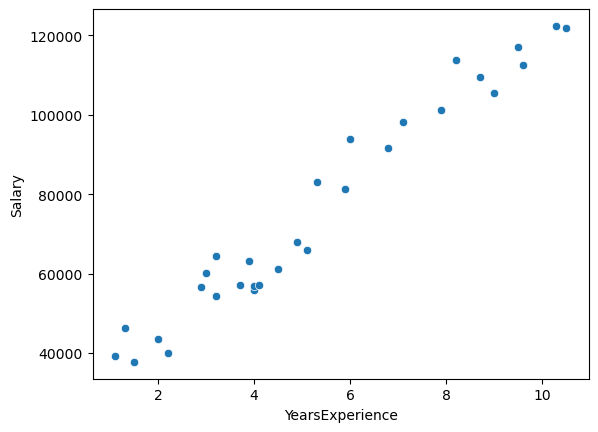

In [13]:
#checking for dependent and independent variables
#plotting for dependent and independent variables 
sn.scatterplot(data.iloc[:,0],data.iloc[:,1])

In [14]:
data = data.rename({"YearsExperience":"YE","Salary":"Sal"},axis = 1)
data.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

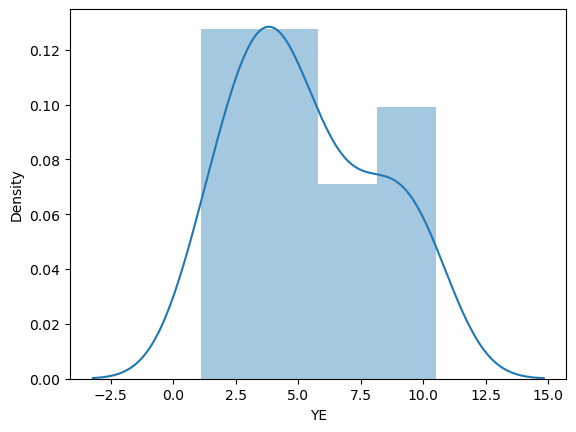

In [16]:
#checking distribution for the variables
sn.distplot(data['YE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

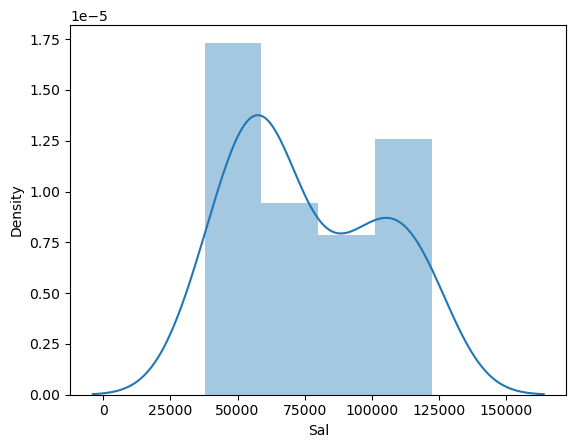

In [17]:
sn.distplot(data['Sal'])

In [19]:
#Building model without transformations
x = data.YE
y = data.Sal

In [21]:
#building our first model
model_1 = smf.ols("Sal~YE",data = data).fit()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE', ylabel='Sal'>

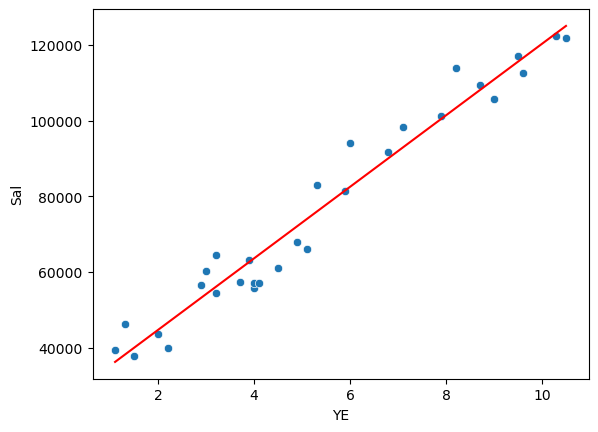

In [22]:
#plot of best line in the no transformation case
plt.plot(x,model_1.params[0]+model_1.params[1]*(x),"r")
sn.scatterplot(x,y)

In [23]:
#cumulating the model summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        12:21:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#since our accuracy is 95.6% may be our model is overfitting

In [25]:
#Log transformation with x and y
log_x = np.log(x)
log_y = np.log(y)
data["log_x"]= log_x
data["log_y"] = log_y

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

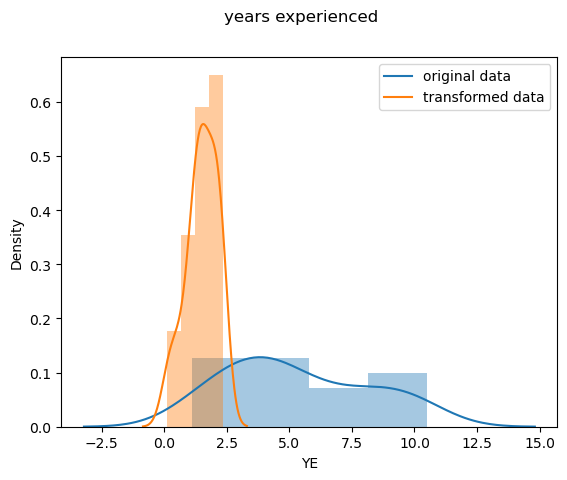

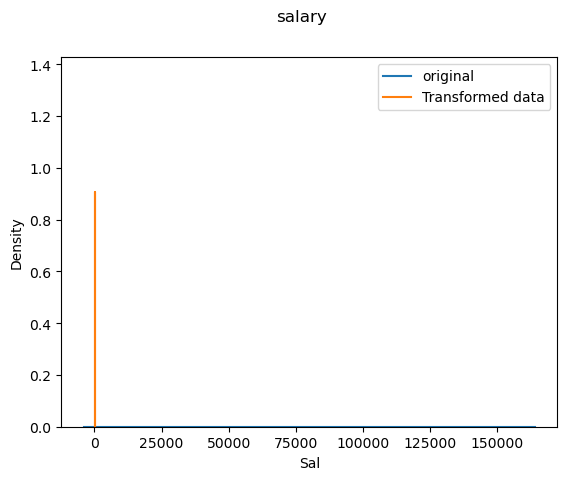

In [26]:
#plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("years experienced")
sn.distplot(x)
sn.distplot(log_x)
labels = ("original data","transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("salary")
sn.distplot(y)
sn.distplot(log_y)

labels = ("original","Transformed data")
plt.legend(labels)
plt.show()

In [28]:
#with log transformed X and Y building model
model_2 = smf.ols("log_y~log_x",data = data).fit()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE', ylabel='Sal'>

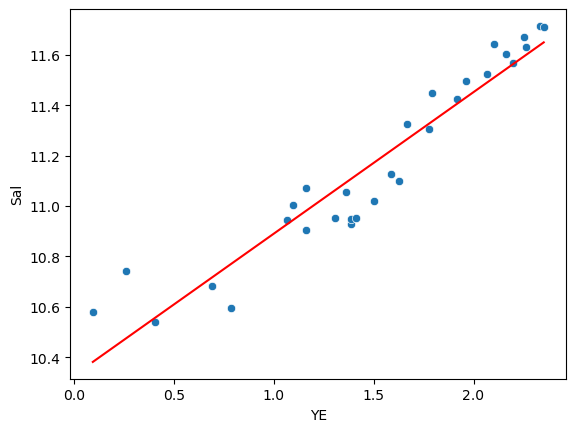

In [29]:
#plot of best line in the log transformation case
plt.plot(log_x,model_2.params[0]+model_2.params[1]*(log_x),"r")
sn.scatterplot(log_x,log_y)

In [30]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           7.40e-16
Time:                        12:25:18   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#After log transformed the accuracy is 90 %

In [32]:
#Square root Transformation
sqrt_x = np.sqrt(x)
sqrt_y = np.sqrt(y)
data["sqrt_x"]= sqrt_x
data["sqrt_y"] = sqrt_y

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

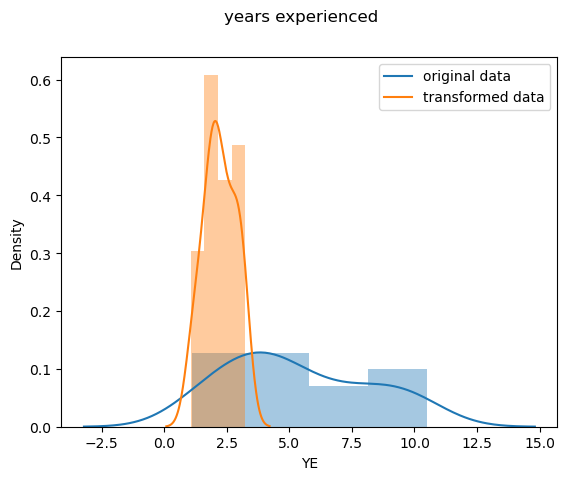

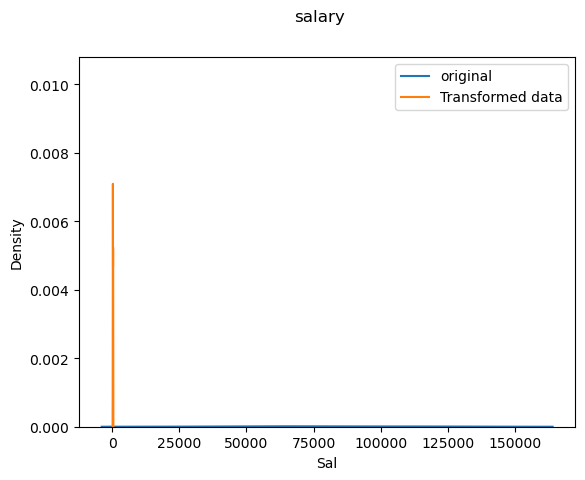

In [34]:
#plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("years experienced")
sn.distplot(x)
sn.distplot(sqrt_x)
labels = ("original data","transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("salary")
sn.distplot(y)
sn.distplot(sqrt_y)

labels = ("original","Transformed data")
plt.legend(labels)
plt.show()

In [36]:
#with square root of X and Y building Model
model_3 = smf.ols("sqrt_y~sqrt_x",data = data).fit()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE', ylabel='Sal'>

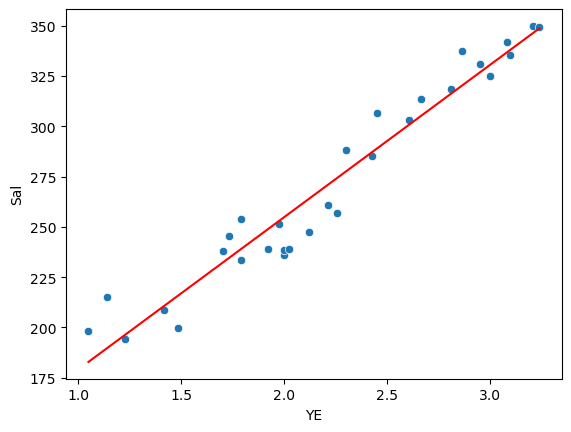

In [38]:
#plot of best line in the log transformation case
plt.plot(sqrt_x,model_3.params[0]+model_3.params[1]*(sqrt_x),"r")
sn.scatterplot(sqrt_x,sqrt_y)

In [39]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqrt_y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           7.58e-19
Time:                        12:27:37   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
sqrt_x        75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#checking with square Transformation


In [42]:
sqr_x = np.square(x)
data["sqr_x"] = sqr_x
sqr_y = np.square(y)
data["sqr_y"] = sqr_y

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

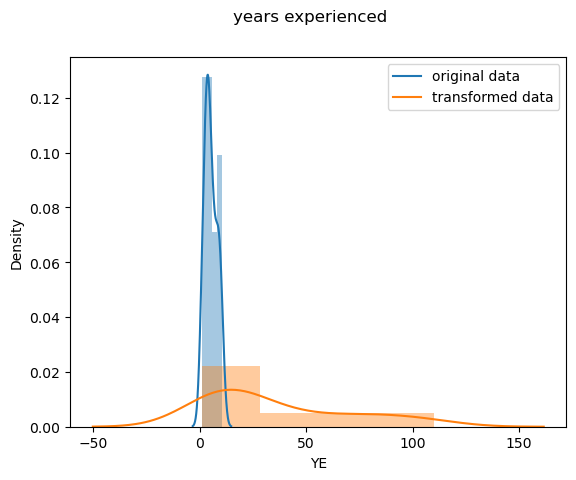

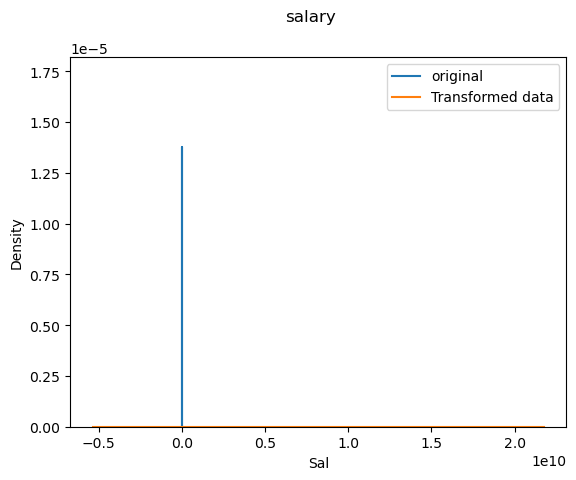

In [43]:
#plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("years experienced")
sn.distplot(x)
sn.distplot(sqr_x)
labels = ("original data","transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("salary")
sn.distplot(y)
sn.distplot(sqr_y)

labels = ("original","Transformed data")
plt.legend(labels)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE', ylabel='Sal'>

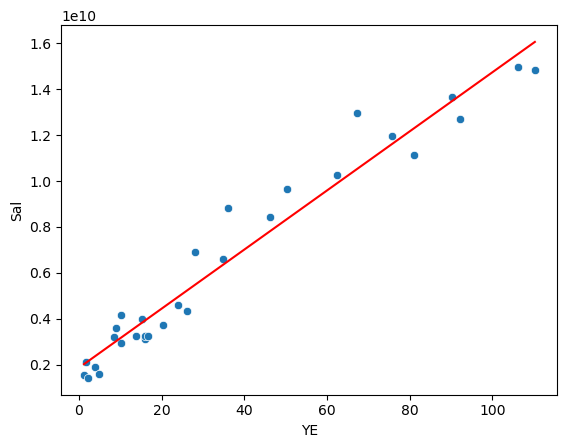

In [45]:
#building model for square transformation
model_4 = smf.ols("sqr_y~sqr_x",data = data).fit()
#plot of best line in the square transformation case
plt.plot(sqr_x,model_4.params[0]+model_4.params[1]*(sqr_x),"r")
sn.scatterplot(sqr_x,sqr_y)

In [46]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sqr_y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     581.9
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.82e-20
Time:                        12:29:12   Log-Likelihood:                -662.35
No. Observations:                  30   AIC:                             1329.
Df Residuals:                      28   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.866e+09   2.61e+08      7.138      0.000    1.33e+09     2.4e+09
sqr_x       1.287e+08   5.34e+06     24.122      0.000    1.18e+08     1.4e+08
==============================================================================
Omnibus:                        6.800   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.404
Skew:                           1.014   Prob(JB):                       0.0671
Kurtosis:                       3.454   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#after all analysis we conclude that our best accuracy is without transformation

In [47]:
#storing our all models in a dataframe 
#checking all are models and r squared 
d2 = {'Prep model':['model_1','model_2','model_3','model_4'],'Rsquared':[model_1.rsquared,
                                                                                   model_2.rsquared,
                                                                                  model_3.rsquared,
                                                                                  model_4.rsquared,
                                                                                  ]}
table = pd.DataFrame(d2)
table

,Prep model,Rsquared
0,model_1,0.956957
1,model_2,0.905215
2,model_3,0.941949
3,model_4,0.954088


In [48]:
model_1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [49]:
#predicting the salary hike 
pred_data = model_1.predict(x)
pred_data

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64